In [ ]:
# importing libraries to used dataframe and apply any numpy fuctions
import pandas as pd
import numpy as np
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#winequality_white = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep=';')
# importing ssl library to handle errors in loading data from web
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
winequality_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
#printing whole dataset of white wine 
winequality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# splitting data into features and target, here quality of wine is target and rest are features
y = winequality_white[['quality']]
X = winequality_white.drop(columns=['quality'])

In [ ]:
# printing head of features dataset
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
#printing head of target dataset
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


# Question 1

In [ ]:
#importing libraries to split features and target data into train and test data
from sklearn.model_selection import train_test_split
# standatard scalar library is imported to scale the values as some features have value in decimals and some very high in comparison
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)

# creating a new dataframe for scaled data of features of train and test
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

#printing the scaled features train dataset
X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4476,-1.009976,-0.772060,0.374521,-1.003439,-0.553163,0.093472,-0.802264,-1.797446,-0.508305,0.260904,1.795251
1938,0.413957,-1.166034,0.127063,-1.023168,-0.696663,-0.487396,-1.269380,-0.411914,0.943179,-1.323063,-0.490877
2343,-0.179349,-1.067541,-0.532822,-0.983710,-0.648829,0.209645,0.248746,-0.498718,1.405014,0.260904,-0.000992
2730,-0.060687,0.212875,-0.945251,-0.036729,0.690503,0.325819,1.206333,1.517816,-0.046469,0.172906,-1.062408
1301,0.057974,-0.772060,0.539492,0.259203,-0.648829,0.906687,0.879352,-0.044664,0.217437,-1.939050,0.733834


In [ ]:
# importing models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

# creating list of parameter values for randomized search cv, so that best parameters can be selected out of it
n_estimators = [5,10,20,30,50,100]
max_depth = [5,10,15,20,25,30,50]
min_samples_split = [1,2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15,20]

grid_param={'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

#creating model of Random forest regressor
rf = RandomForestRegressor(random_state=1)
from sklearn.metrics import r2_score, make_scorer
s = make_scorer(r2_score) 
# finding best tuning parameters for tge model with randomized search cv
rf_rfcv = RandomizedSearchCV(estimator = rf, param_distributions = grid_param, n_iter = 50, cv = 10, n_jobs = -1, scoring = s)
# fitting the model on train scaled data
rf_rfcv.fit(X_train_scaled, y_train)
# printing best parameters of model
print(rf_rfcv.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
# importing r2 score metric to evalute the model
from sklearn.metrics import r2_score
y_train_pred = rf_rfcv.predict(X_train_scaled)
#train_score_rfcv = r2_score(y_train, y_train_pred)
train_score_rfcv = r2_score(y_train, y_train_pred)
#train data r2 score on rfcv
print(f'Train data R-2 score: {train_score_rfcv:>5.3}')

Train data R-2 score: 0.901


In [ ]:
# finding r2 score of test dataset based on its prediction
y_test_pred = rf_rfcv.predict(X_test_scaled)
test_score_rfcv = r2_score(y_test, y_test_pred)
print(f'Test data R-2 score: {test_score_rfcv:>5.3}')

Test data R-2 score: 0.521


In [ ]:
# as the randomized search cv was giving new parameters each time, these following parameters gave the best results 
rf1 = RandomForestRegressor(random_state = 1, n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_depth = 50 )
rf1.fit(X_train_scaled,y_train)
y_test_pred = rf1.predict(X_test_scaled)
test_score = r2_score(y_test, y_test_pred)
# printing test data r2 score with predicted y values 
print(f'Test data R-2 score: {test_score:>5.3}')

Test data R-2 score: 0.531


In [ ]:
# printing MAE, MSE and RMSE on predicted values from random forest model and not from randomized search cv 
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error (MAE): 0.43506938775510207
Mean Squared Error (MSE): 0.3506120816326531
Root Mean Squared Error (RMSE): 0.5921250557379354


# Question 2

In [ ]:
# importing cross val score to perform cross validation and finding its score
from sklearn.model_selection import cross_val_score
# applying drop feature importance on the passed model and data, where each features is dropped and model is trained on rest of features
# if the new data score changes then it is assumed as that feature is effecting the result on target values 
def drop_feature_importance(est, X, y):
  # finding the base score of model with all features
  base_score = np.mean(cross_val_score(est, X, y))
  # creating list to store scores
  scores = []
  # loop through features columns and dropping each column and finding difference between base and new score and finally return scores to called function
  for feature in range(X.shape[1]):
    mask = np.ones(X.shape[1], 'bool')
    mask[feature] = False
    X_new =  X.iloc[:,mask]
    this_score = np.mean(cross_val_score(est, X_new, y))
    scores.append(base_score - this_score)
  return np.array(scores)

In [ ]:
# drop feature importance is called with random forest model and test data and printing retured score values
S = drop_feature_importance(rf1, X_test_scaled, y_test)
print(S)

[ 0.00139485  0.01550192  0.00720531  0.01077937  0.00736006  0.0376016
 -0.00415632  0.00696766  0.00662803  0.00508328  0.04146547]


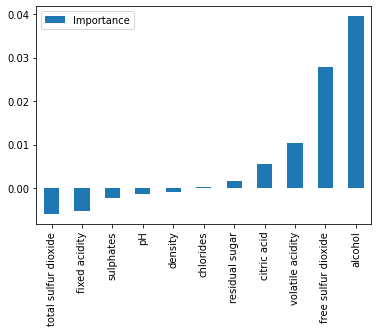

In [ ]:
# creating a dictionary to store column names and their importance
features = {}
# loop to map importance of each column in data with their name and add it in dict 
for col, importance in zip(X_train_scaled.columns, S):
    features[col] = importance 

# creating a dataframe from that created dictionary of feature importance
dropfeature_importance = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
dropfeature_importance.sort_values(by='Importance').plot(kind='bar')

From the above plotted bar it can seen that alcohol is the most important feature to define quality of white wine, also free sulphur dioxide. But chlorides and density does not make any good impact on quality. These results are based on drop feature importance model.

# Question 3

In [ ]:
# installing eli5 library to apply permutation importance
!pip install eli5

In [ ]:
# importing permutation importance from eli5 library
from eli5.sklearn import PermutationImportance

#creating model with permutattion importance function and passing randomized searchcv model and fitting the model with train data
permutation_importance_model = PermutationImportance(rf_rfcv, random_state=1).fit(X_train_scaled, y_train)

# internally instead of dropping each feature column is permuted shuffled as being as nullified.
# if the total score chnages then than that feature is important. 
#eli5 has show_weights function which sorts the list of values in the model score data and prints it in decreasig order
eli5.show_weights(permutation_importance_model, feature_names = X_test_scaled.columns.tolist())

Weight,Feature
0.7224 ± 0.0372,alcohol
0.3571 ± 0.0094,volatile acidity
0.2528 ± 0.0118,free sulfur dioxide
0.1481 ± 0.0040,pH
0.1222 ± 0.0059,residual sugar
0.1198 ± 0.0051,chlorides
0.0953 ± 0.0039,total sulfur dioxide
0.0916 ± 0.0045,citric acid
0.0883 ± 0.0034,fixed acidity
0.0833 ± 0.0045,density


It can been that this model finds that alcohol has highest importance and sulphates have least imortance. There is a change in results from previous model as it found chlorides as least importance of all, but here it has some importance.

In [ ]:
'''
from sklearn.utils import shuffle
def permutation_importance(est, X, y, n_repeat=100):
    #rf1.fit(X,y)
    #y_pred = rf1.predict(X_test_scaled)
    baseline_score = est.score(X, y)
    scores=  np.zeros((11, n_repeat)) 
    for f_idx in range(X.shape[1]):
        #scores.append(np.zeros(n_repeat))
        for repeat in range(n_repeat):
            X_new = X.copy()
            X_new.iloc[:, f_idx] = shuffle(X.iloc[:, f_idx])
            feature_score = est.score(X_new, y)
            scores[f_idx, repeat] = baseline_score - feature_score
    return scores'''

'\nfrom sklearn.utils import shuffle\ndef permutation_importance(est, X, y, n_repeat=100):\n    #rf1.fit(X,y)\n    #y_pred = rf1.predict(X_test_scaled)\n    baseline_score = est.score(X, y)\n    scores=  np.zeros((11, n_repeat)) \n    for f_idx in range(X.shape[1]):\n        #scores.append(np.zeros(n_repeat))\n        for repeat in range(n_repeat):\n            X_new = X.copy()\n            X_new.iloc[:, f_idx] = shuffle(X.iloc[:, f_idx])\n            feature_score = est.score(X_new, y)\n            scores[f_idx, repeat] = baseline_score - feature_score\n    return scores'

In [ ]:
'''S1 = permutation_importance(rf1, X_test_scaled, y_test)
print(S1)
#sorted_idx = S1.mean()
print(S1.shape)'''

'S1 = permutation_importance(rf1, X_test_scaled, y_test)\nprint(S1)\n#sorted_idx = S1.mean()\nprint(S1.shape)'

# Question 4

In [ ]:
# installing shap library
!pip install shap

In [ ]:
# importing shap
import shap
# shap values are calculated as the average of the marginal contributions across all permutations with the help of TreeExplainer which takes model as argument
shap_values = shap.TreeExplainer(rf1).shap_values(X_train_scaled)

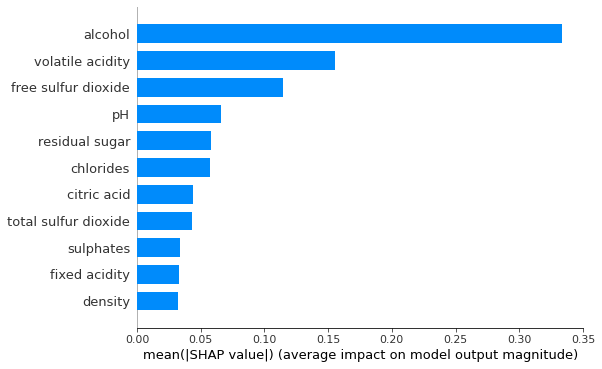

In [ ]:
# shap summary plot function which plots significance of each feature on target
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")

It can be seen from the above plot that alcohol is still the top most imporatant feature but density is the least acoording to this model. it can be said that this models prediction are little different from other two.

# Question 5

In [ ]:
# importing partial dependency plot from sklearn inspection
from sklearn.inspection import plot_partial_dependence

[]

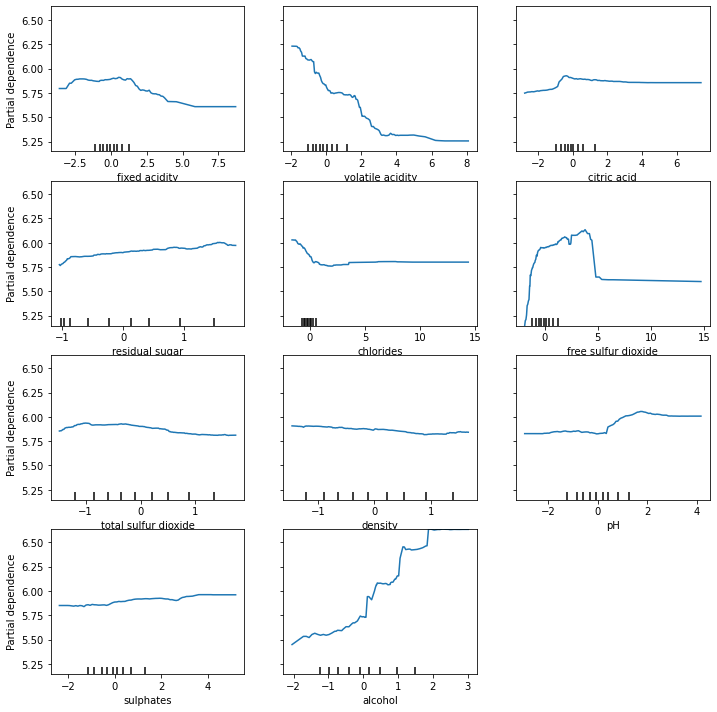

In [ ]:
# importing matplotlib to plot the figures
import matplotlib.pyplot as plt
%matplotlib inline
list_of_features = ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides','free sulfur dioxide',
                    'total sulfur dioxide','density','pH', 'sulphates','alcohol']
figure, axes = plt.subplots( 11 ,figsize=( 10, 10)) 
# plotting PDP plot which shows that how each feature is dependent on target partially
# partially means that for each point on graph of any current sample of feature we take all samples from rest of the features and find its mean 
plot_partial_dependence(rf_rfcv.best_estimator_, X_train_scaled, list_of_features, fig=figure,grid_resolution=200)
plt.tight_layout() 
plt.plot() 

From the above plotted graphs we can see that alcohol is most important of all as it is more linearly dependent on partial dependence than any other feature. we also see volatile acidity and free sulpher dioxide graph also vary. But density has the least dependence according to PDP as its graph is almost flat when compared to any other feature, citric acid was almost the same. 

# Question 6

In [ ]:
# installing pycebox
!pip install pycebox

In [ ]:
# importing ice and ice plot from pycebox library
from pycebox.ice import ice, ice_plot

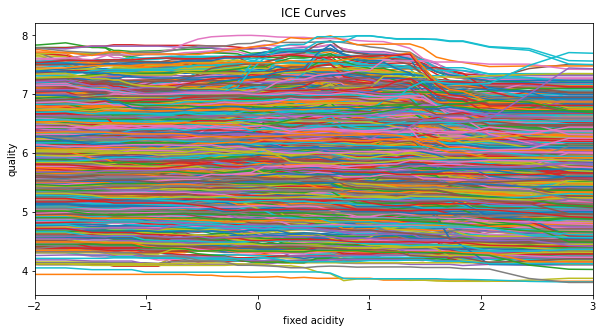

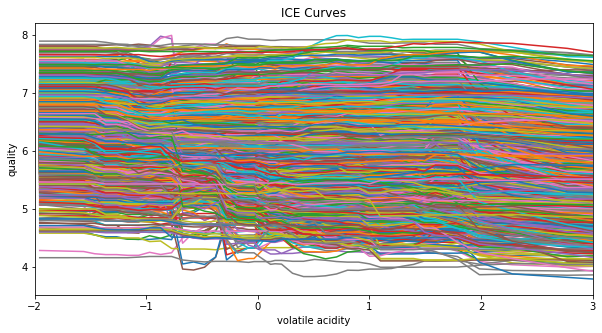

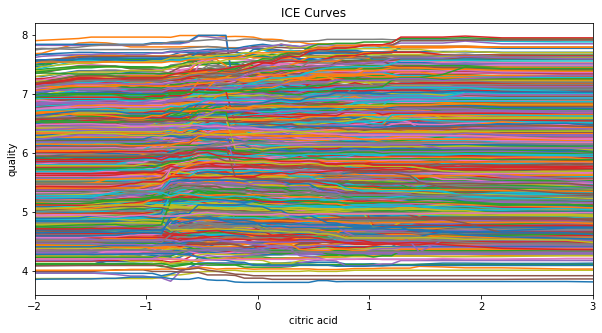

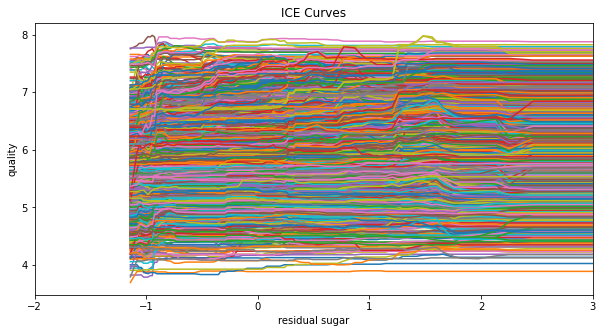

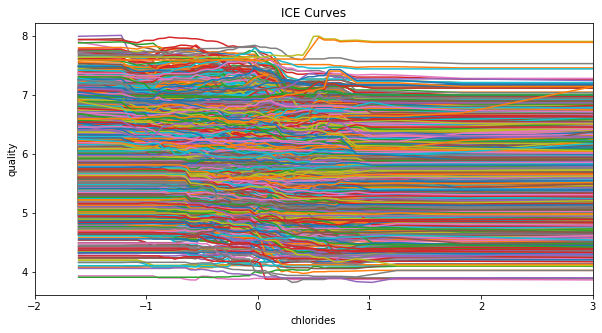

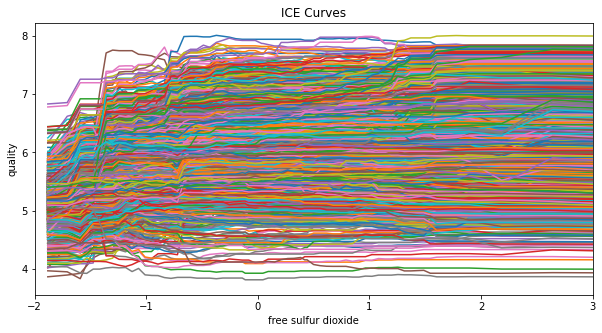

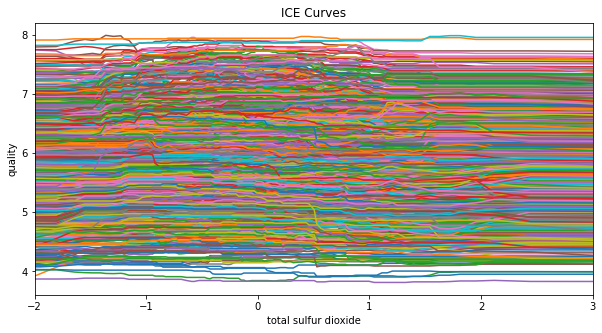

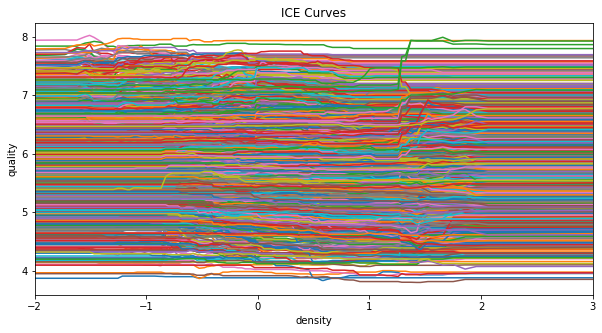

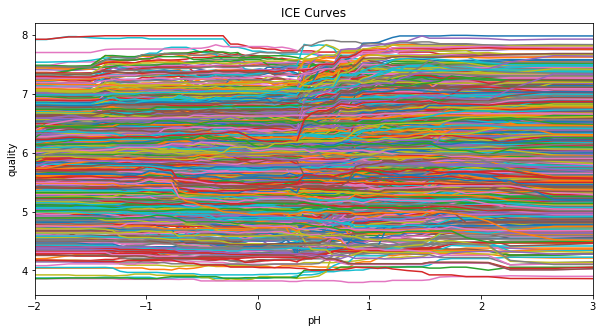

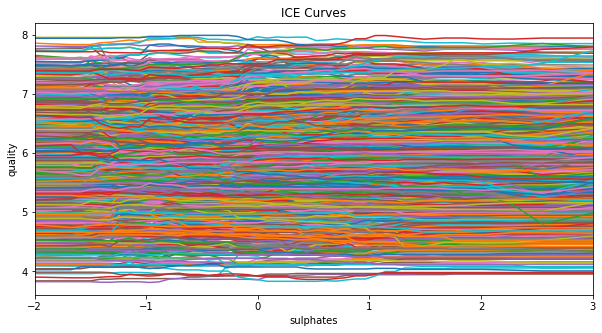

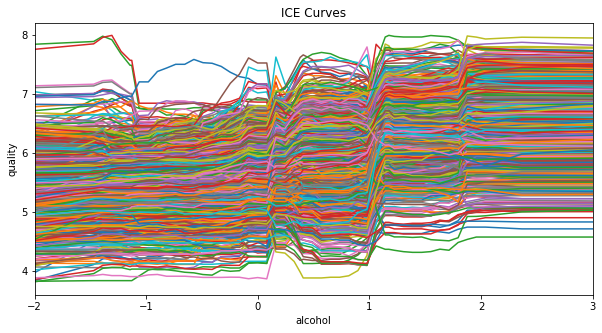

In [ ]:
# importing plasma color pallete to define each sample in plot as different and more understandable
from matplotlib.cm import plasma
# looping through list of features 
for i in X_train_scaled.columns:
  # ice function is used to create a dataframe of individually generated conditioanal curves against the fitted model 
  ice_df = ice(X_train_scaled, i, rf_rfcv.best_estimator_.predict, num_grid_points=100)
  # figure is created to plot all features ice plot
  fig, (ice_ax) = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(10, 5))
  # ice_plot is used to plot the values obtained from ice function dataframe for each feature
  # here each sample is plotted on the graph with respect to changing samples of rest of the features 
  ice_plot(ice_df, frac_to_plot=1.0, cmap='plasma', ax=ice_ax);
  ice_ax.set_xlabel(i);
  ice_ax.set_xlim(-2,3);
  ice_ax.set_ylabel('quality');
  ice_ax.set_title('ICE Curves');

All the features curves almost looks the same, but few features like alcohol and free sulphur dioxide are clearly explainable that how each sample's effect is gradually increasing for each increasing value in them. There is some changes in between for many samples but it is not very clear to understand with these many samples in the dataset which are following almost the same path. 

# Queston 7

From all the models above, I found that PDP plots were more explainable and understandable for each feature. Although the Shap values, permutation importance and drop feature importance plot gave more or less similar results. PDP is useful because it explained each feaure how it changes and effects the model which was not clear in all those previous models.

Problem with ICE BOX plots were that each sample in feature were follwing mostly the same path and as there were many samples there was not much clearity to interprate the model. While the PDP model was not discribing for each sample seperately as ICE box, although it was taking mean of those results. But it was clear to understand.